# Credit Card Fraud Detection-SMOTE-Models Comparison

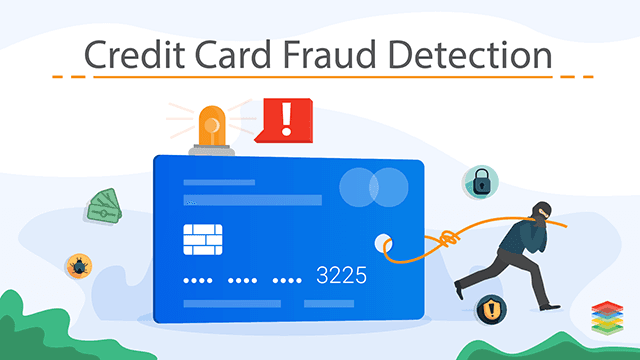

**Introduction**

Credit card fraud is an inclusive term for fraud committed using a payment card, such as a credit card or debit card. The purpose may be to obtain goods or services, or to make payment to another account which is controlled by a criminal. The Payment Card Industry Data Security Standard (PCI DSS) is the data security standard created to help businesses process card payments securely and reduce card fraud.

Credit card fraud can be authorised, where the genuine customer themselves processes a payment to another account which is controlled by a criminal, or unauthorised, where the account holder does not provide authorisation for the payment to proceed and the transaction is carried out by a third party. In 2018, unauthorised financial fraud losses across payment cards and remote banking totalled £844.8 million in the United Kingdom. Whereas banks and card companies prevented £1.66 billion in unauthorised fraud in 2018. That is the equivalent to £2 in every £3 of attempted fraud being stopped. (Wiki)

**About the Data**

The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

**Importing Libraries**

In [57]:
# Import packages

# pandas to read data
import pandas as pd

#numpy for linear algebra and math
import numpy as np

# scipy stats for statistics
from scipy import stats

#visuals
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import plotly.express as px
import matplotlib.gridspec as gridspec #for grid plots
#set seaborn sytle
sns.set(style='darkgrid', palette='colorblind')

# display max columns
pd.set_option('display.max_columns', None)

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

**Reading and Investigation of the Data**

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.columns = df.columns.str.lower()

In [4]:
df.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.tail()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


> Due to privacy issues, original features V1, V2, V3,... V28 have been transformed with PCA.

> The only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.

> Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise





In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    284807 non-null  float64
 1   v1      284807 non-null  float64
 2   v2      284807 non-null  float64
 3   v3      284807 non-null  float64
 4   v4      284807 non-null  float64
 5   v5      284807 non-null  float64
 6   v6      284807 non-null  float64
 7   v7      284807 non-null  float64
 8   v8      284807 non-null  float64
 9   v9      284807 non-null  float64
 10  v10     284807 non-null  float64
 11  v11     284807 non-null  float64
 12  v12     284807 non-null  float64
 13  v13     284807 non-null  float64
 14  v14     284807 non-null  float64
 15  v15     284807 non-null  float64
 16  v16     284807 non-null  float64
 17  v17     284807 non-null  float64
 18  v18     284807 non-null  float64
 19  v19     284807 non-null  float64
 20  v20     284807 non-null  float64
 21  v21     28

In [7]:
df.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
time,284807.000000,94813.859575,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
v1,284807.000000,0.000000,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
v2,284807.000000,0.000000,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
v3,284807.000000,-0.000000,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
v4,284807.000000,0.000000,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
v5,284807.000000,-0.000000,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
v6,284807.000000,0.000000,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
v7,284807.000000,-0.000000,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
v8,284807.000000,-0.000000,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
v9,284807.000000,-0.000000,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


Investigating null values

In [8]:
df.isnull().sum().max()

0

There is no null values in dataset. Lets explore our non-transformed columns.



*   Time
*   Amount
*   Class







In [9]:
df[['time','amount','class']].describe().T

,count,mean,std,min,25%,50%,75%,max
time,284807.0,94813.859575,47488.145955,0.0,54201.5,84692.0,139320.500,172792.00
amount,284807.0,88.349619,250.120109,0.0,5.6,22.0,77.165,25691.16
class,284807.0,0.001727,0.041527,0.0,0.0,0.0,0.000,1.00


In [10]:
print("Distribution of Normal(0) and Fraud(1)")
print(df['class'].value_counts())
print('\n')
print(df['class'].value_counts(normalize=True))

Distribution of Normal(0) and Fraud(1)
0    284315
1       492
Name: class, dtype: int64


0    0.998273
1    0.001727
Name: class, dtype: float64


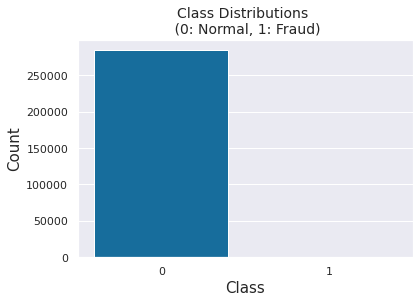

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(df['class'])
plt.title('Class Distributions \n (0: Normal, 1: Fraud)', fontsize=14)
plt.xlabel("Class", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

> As we can see from distribution of 'class' column, we have a clearly imbalanced data

> Lets explore our 'time', 'amount' columns and then we can explore our V columns




**Distribution of Time and Amount Columns**

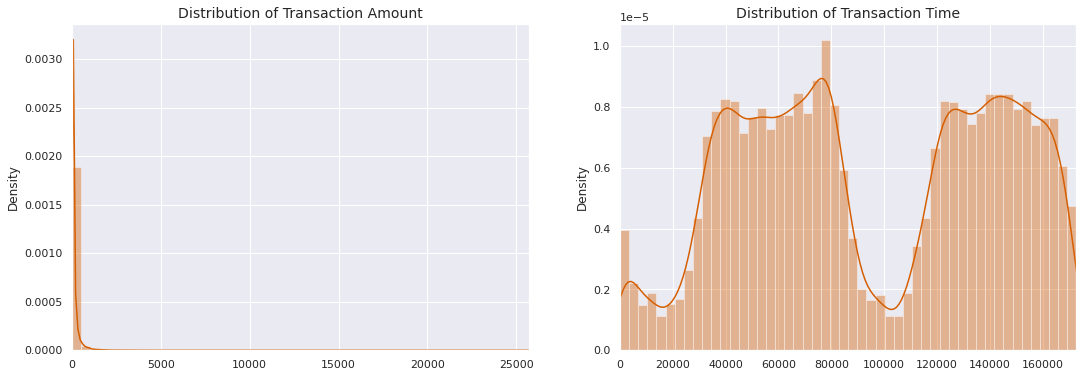

Distribution of Amount Skewness:  16.98
Distribution of Amount Kurtosis:  845.08
******************************
Distribution of Time Skewness:  -0.04
Distribution of Time Kurtosis:  -1.29


In [12]:
fig, ax = plt.subplots(1, 2, figsize=(18,6))

amount_value = df['amount'].values
time_value = df['time'].values

sns.distplot(amount_value, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_value), max(amount_value)])

sns.distplot(time_value, ax=ax[1], color='r')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_value), max(time_value)])

plt.show()
print('Distribution of Amount Skewness: ',"{:.2f}".format(stats.skew(df['amount'])))
print('Distribution of Amount Kurtosis: ',"{:.2f}".format(stats.kurtosis(df['amount'])))
print('*'*30)
print('Distribution of Time Skewness: ',"{:.2f}".format(stats.skew(df['time'])))
print('Distribution of Time Kurtosis: ',"{:.2f}".format(stats.kurtosis(df['time'])))

By seeing the distributions we can have an idea how skewed are these features

> As we can see from graphs there is outliers in 'amount' column.

> By seeing the amount graph most the transaction amount falls between 0 and about 3000 and we have some outliers for really big amount transactions and it may actually make sense to drop those outliers in our analysis if they are just a few points that are very extreme.

> By seeing the time graph, we can see there are two peaks in the graph and even there are some local peaks. We can think of these as the time of the day like the peak is the day time when most people do the transactions and the depth is the night time when most people just sleeps. We already know that data contains a credit card transaction for only two days, so there are two peaks for day time and one depth for one night time.







**Distribution of Amount for Normal and Fraud Transactions**

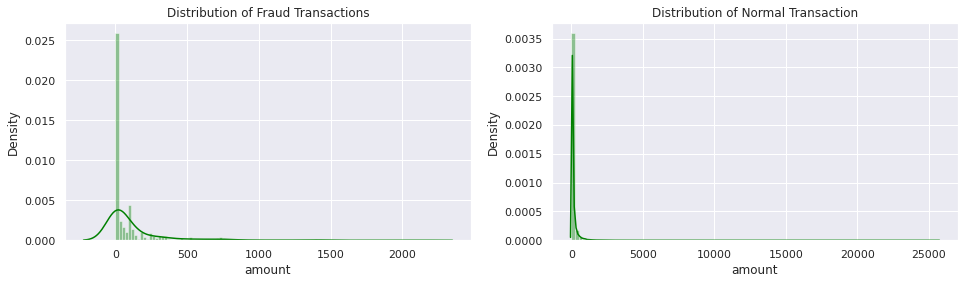

In [13]:
fig, ax = plt.subplots(ncols = 2, figsize = (16,4))
sns.distplot(df[df['class'] == 1]['amount'], bins=100, color = 'green', ax = ax[0])
ax[0].set_title("Distribution of Fraud Transactions")

sns.distplot(df[df['class'] == 0]['amount'], bins=100, color = 'green', ax = ax[1])
ax[1].set_title("Distribution of Normal Transaction")

plt.show()

As we can see from graph most of the fraud transaction amount is less than 500 dollars.

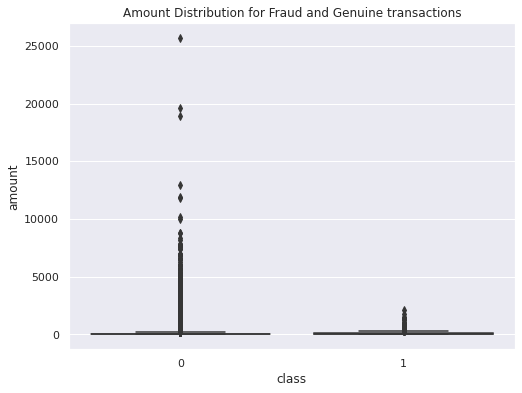

In [14]:
plt.figure(figsize=(8,6))
sns.boxplot(x='class', y='amount',data = df)
plt.title('Amount Distribution for Fraud and Genuine transactions')
plt.show()

Most the transaction amount falls between 0 and about 3000 and we have some outliers for really big amount transactions and it may actually make sense to drop those outliers in our analysis if they are just a few points that are very extreme. Also it won't be useful to actually have our model train on these extreme outliers. 

**Distribution of Time for Normal and Fraud Transactions**

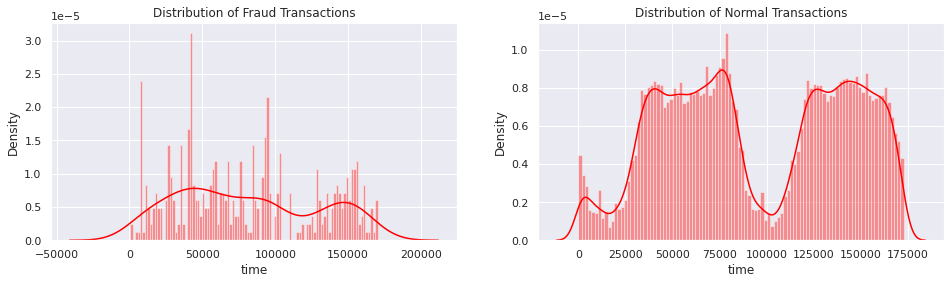

In [15]:
fig, ax = plt.subplots(ncols = 2, figsize =(16,4))
sns.distplot(df[(df['class'] == 1)]['time'], bins=100, color='red', ax=ax[0])
ax[0].set_title("Distribution of Fraud Transactions")

sns.distplot(df[(df['class'] == 0)]['time'], bins=100, color='red', ax=ax[1])
ax[1].set_title("Distribution of Normal Transactions")

plt.show()

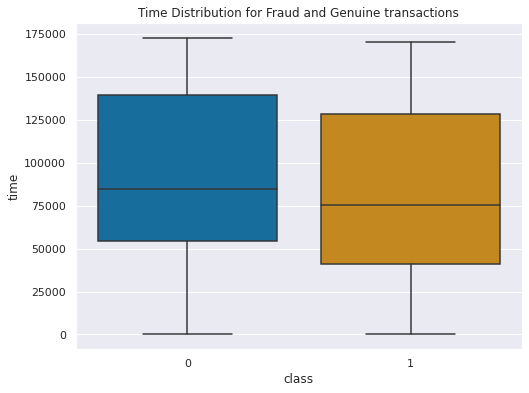

In [16]:
plt.figure(figsize=(8,6))
sns.boxplot(x='class', y='time',data = df)
plt.title('Time Distribution for Fraud and Genuine transactions')
plt.show()

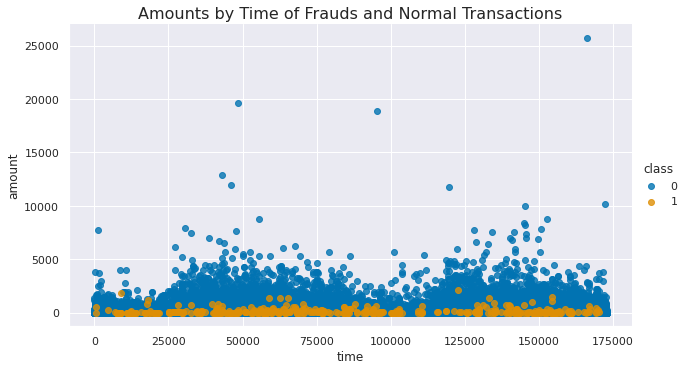

In [17]:
    ax = sns.lmplot(y="amount", x="time", fit_reg=False,aspect=1.8,
                    data=df, hue='class')
    plt.title("Amounts by Time of Frauds and Normal Transactions",fontsize=16)
    plt.show()

Our Time feature are in seconds so we will transform it to  hours to get a better understand of the patterns.

In [18]:
td = pd.to_timedelta(df['time'], unit='s')
df['hour'] = (td.dt.components.hours).astype(int)

Exploring the distribution by Class types throught hours

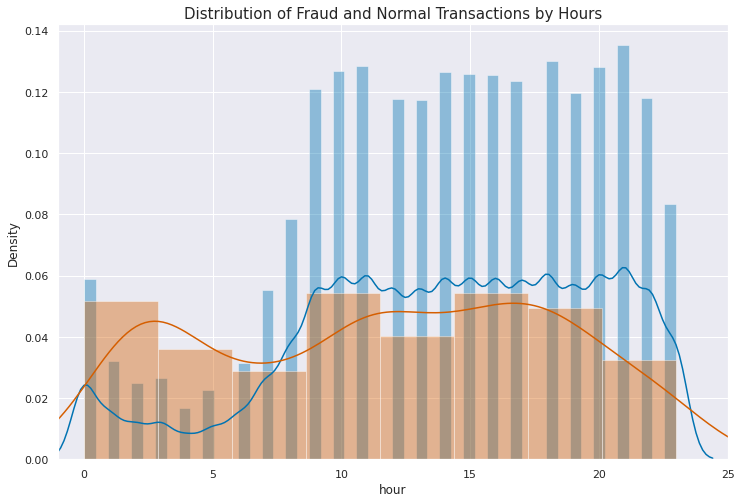

In [19]:
plt.figure(figsize=(12,8))
sns.distplot(df[df['class'] == 0]["hour"], 
             color='b')
sns.distplot(df[df['class'] == 1]["hour"], 
             color='r')
plt.title('Distribution of Fraud and Normal Transactions by Hours', fontsize=15)
plt.xlim([-1,25])
plt.show()

As we can see from graph most of the Fraud transactions are happening at night time when most of the people are sleeping and Genuine transaction are happening during day time.

Lets look distribution of V columns

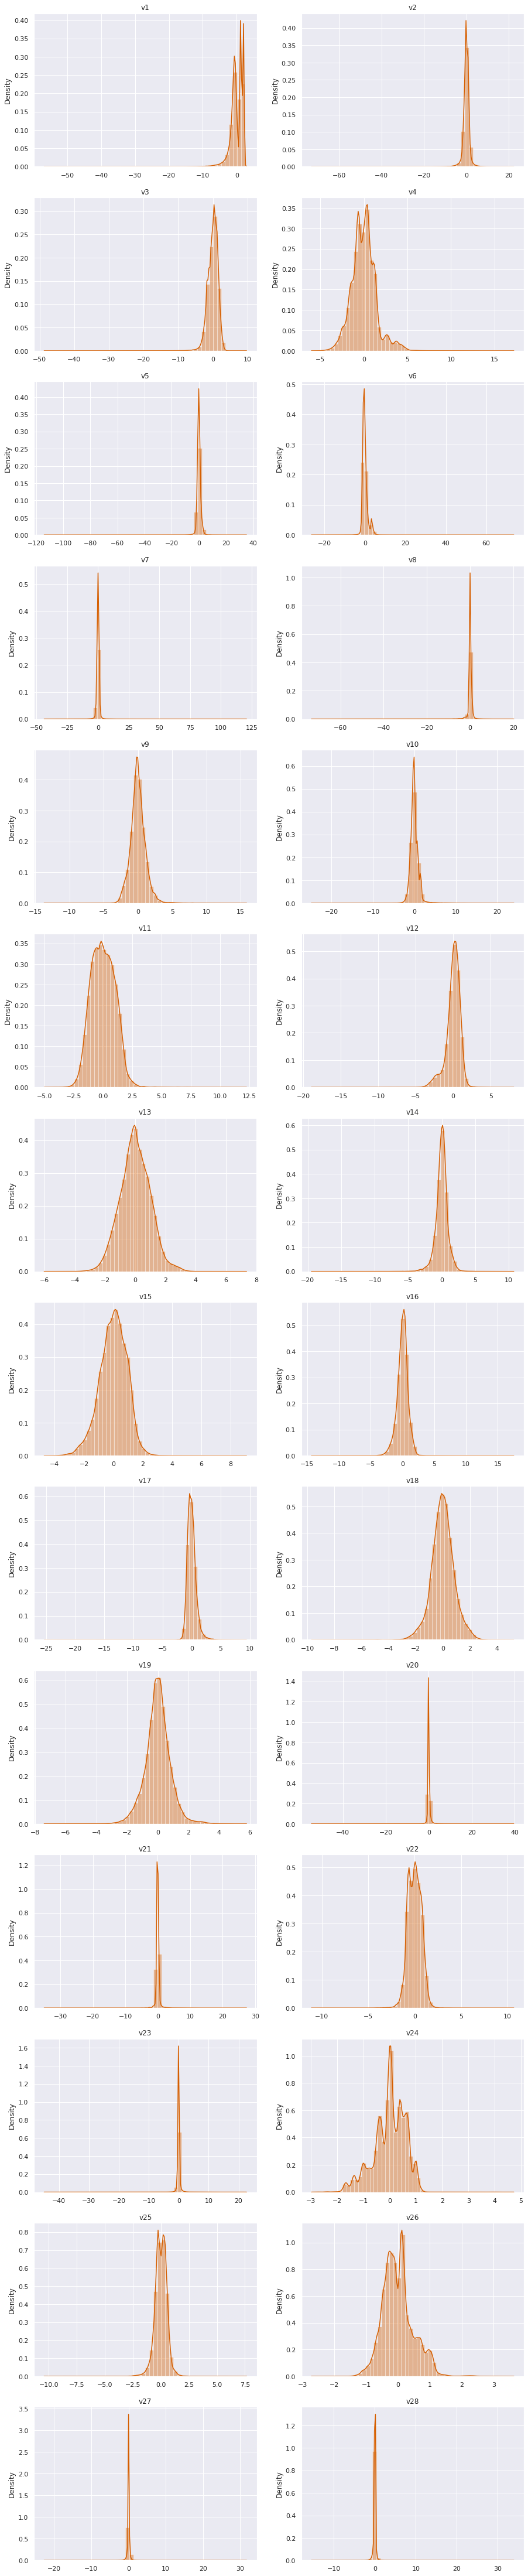

v1  skewness is :  -3.2806500243599563
v2  skewness is :  -4.624841215356954
v3  skewness is :  -2.2401436419416556
v4  skewness is :  0.6762885361363855
v5  skewness is :  -2.4258887193785577
v6  skewness is :  1.8265710448869008
v7  skewness is :  2.5538939666831117
v8  skewness is :  -8.521899311980174
v9  skewness is :  0.5546768505565418
v10  skewness is :  1.1871343376109698
v11  skewness is :  0.3565039778679557
v12  skewness is :  -2.2783889356830715
v13  skewness is :  0.0652331143394307
v14  skewness is :  -1.9951653322115102
v15  skewness is :  -0.30842135775467616
v16  skewness is :  -1.1009604775565411
v17  skewness is :  -3.8448942237357953
v18  skewness is :  -0.25987889937453285
v19  skewness is :  0.10919118489771402
v20  skewness is :  -2.0371445699300104
v21  skewness is :  3.5929722697554753
v22  skewness is :  -0.21325649967250146
v23  skewness is :  -5.875109397316075
v24  skewness is :  -0.5524963913014509
v25  skewness is :  -0.4157904004474158
v26  skewness is 

In [20]:
V_columns = df.iloc[:,1:29].columns

grid = gridspec.GridSpec(14, 2)
plt.figure(figsize=(15,20*4))
for n, col in enumerate(df[V_columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(df[col], bins = 50, color='r')
    min_ylim, max_ylim = plt.ylim()
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
plt.show()
for x in df[V_columns]:
    print(x, ' skewness is : ', stats.skew(df[V_columns][x]))
    

Let’s apply RobustScaler technique on the columns “amount - time” to transform the range of values. We drop the original “amount - time” columns and add a new columns with the scaled values.

**Pre-processing of the Data**

In [21]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
df['scaled_amount'] = rs.fit_transform(df['amount'].values.reshape(-1,1))
df['scaled_time'] = rs.fit_transform(df['time'].values.reshape(-1,1))

df.drop(['time', 'amount'], axis=1, inplace=True)
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']
df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.drop('hour', axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(0, 'scaled_time', scaled_time)
df.head()

,scaled_time,scaled_amount,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,class
0,-0.994983,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.994983,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-0.994972,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.994972,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.994960,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [22]:
df[['scaled_amount','scaled_time']].describe().T

,count,mean,std,min,25%,50%,75%,max
scaled_amount,284807.0,0.927124,3.495006,-0.307413,-0.229162,0.0,0.770838,358.683155
scaled_time,284807.0,0.118914,0.557903,-0.994983,-0.358210,0.0,0.641790,1.035022


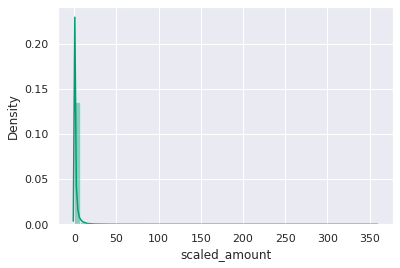

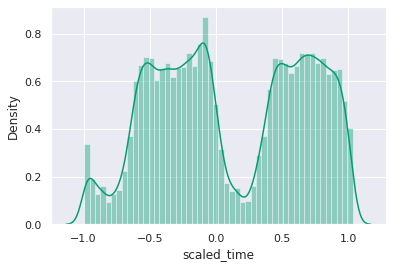

In [23]:
for col in ['scaled_amount','scaled_time']:
    sns.distplot(df[col], bins = 50, color='g')
    plt.show()

As u can see from table 'scaled amount' value gathered around -0.22 to 0.77 but max value is 358. So there is outliers at 'scaled amount' column and it would be better to drop those outliers.

**Class Imbalance**

Now we can handle with class imbalance. For handle the imbalanced data we will use SMOTE method.

We first divide our dataset, then use SMOTE method, and then train our model on train set

In [24]:
from sklearn.model_selection import train_test_split

X=df.drop('class', axis=1)
y=df['class']

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=42)

train_data= pd.concat([X_train, y_train], axis=1)
test_data= pd.concat([X_test, y_test], axis=1)
print("Shape of train_X: ", X_train.shape)
print("Shape of test_X: ", X_test.shape)

Shape of train_X:  (227845, 30)
Shape of test_X:  (56962, 30)


In [25]:
train_data.head()

,scaled_time,scaled_amount,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,class
223361,0.689153,-0.167819,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,-0.030441,0.624996,1.691496,1.255790,-0.253266,-0.331695,0.307252,-0.930844,0.651666,0.167987,-0.125390,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,0
165061,0.381595,0.333962,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,0.611115,-1.945070,-0.726597,1.060888,-1.193347,0.631053,-0.160123,-1.630444,2.106866,-1.692780,-0.470372,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,0
238186,0.762145,-0.139873,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,-0.638222,0.521931,-0.072768,-1.008237,-0.640249,-0.801946,0.678131,0.044374,0.521919,0.198772,0.012227,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,0
150562,0.105476,1.333613,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,0.560595,-0.855437,-4.179628,0.286872,1.271254,-1.011647,1.458600,-0.613260,0.814931,-2.147124,-0.253757,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,0
138452,-0.023931,0.052540,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,1.221746,0.472626,1.595929,0.777603,0.187685,-1.060579,0.143332,0.007803,-0.055817,0.712695,-0.012320,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,0


In [26]:
test_data.head()

,scaled_time,scaled_amount,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,class
43428,-0.507372,4.781527,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,5.299236,-10.834006,1.671120,-9.373859,0.360806,-9.899247,-19.236292,-8.398552,3.101735,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,1
49906,-0.474994,6.960386,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,-0.087670,0.979427,0.076883,-0.217884,-0.136830,-2.142892,0.126956,1.752662,0.432546,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,0
29474,-0.578108,0.125760,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,0.543827,0.112453,1.075384,-0.245772,0.180483,1.769860,-0.533172,-0.533300,1.192245,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,0
276481,0.968421,-0.286453,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,-1.328335,0.223621,1.132627,-0.550875,0.616568,0.497974,0.502195,0.981343,0.101264,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,0
278846,0.984281,-0.294977,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,0.942162,0.850038,-0.616166,0.592634,-0.603845,0.091077,-0.471867,-0.333816,0.404711,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0


**SMOTE**

Before OverSampling, counts of label '1', %: 0.17292457591783889
Before OverSampling, counts of label '0', %: 99.82707542408215 

After OverSampling, the shape of train_x: (454902, 30)
After OverSampling, the shape of train_y: (454902,) 

After OverSampling, counts of label '1', %: 50.0
After OverSampling, counts of label '0', %: 50.0


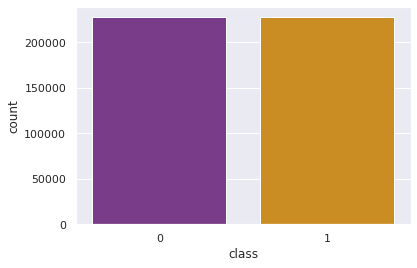

In [27]:
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1', %: {}".format(sum(y_train==1)/len(y_train)*100.0,2))
print("Before OverSampling, counts of label '0', %: {} \n".format(sum(y_train==0)/len(y_train)*100.0,2))

sm = SMOTE(random_state=2)
X_train_o, y_train_o = sm.fit_resample(X_train, y_train)

print('After OverSampling, the shape of train_x: {}'.format(X_train_o.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_o.shape))

print("After OverSampling, counts of label '1', %: {}".format(sum(y_train_o==1)/len(y_train_o)*100.0,2))
print("After OverSampling, counts of label '0', %: {}".format(sum(y_train_o==0)/len(y_train_o)*100.0,2))

sns.countplot(x=y_train_o, data=df, palette='CMRmap')

**Applying Models**

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve, accuracy_score, classification_report
def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

In [29]:
def print_result (model, X_train, y_train, X_test, y_test):
    x = model()
    x.fit(X_train, y_train)
    y_pred = x.predict(X_test)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    print()
    metrics(y_test, y_pred.round())

    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    y_pred_prob = x.predict_proba(X_test)[:,1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    plt.plot(precision, recall)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.show()

Evaluation of DecisionTreeClassifier After SMOTE

Accuracy: 0.99781
Precision: 0.42541
Recall: 0.78571
F1-score: 0.55197


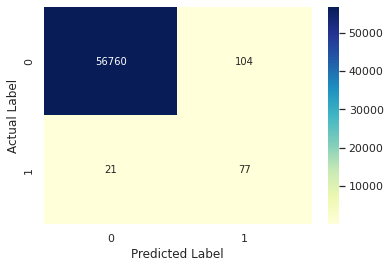

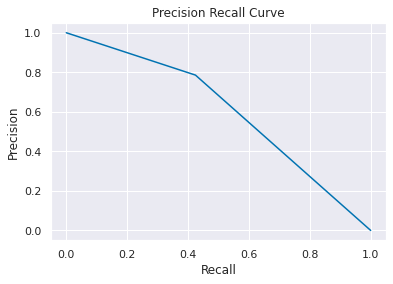

In [ ]:
print('Evaluation of DecisionTreeClassifier After SMOTE')
print_result(DecisionTreeClassifier, X_train_o, y_train_o, X_test, y_test)

Evaluation of RandomForestClassifier After SMOTE

Accuracy: 0.99960
Precision: 0.92135
Recall: 0.83673
F1-score: 0.87701


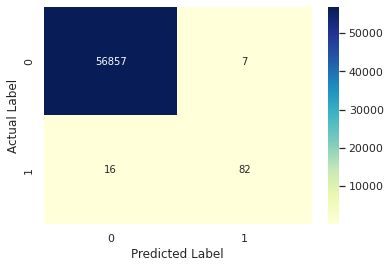

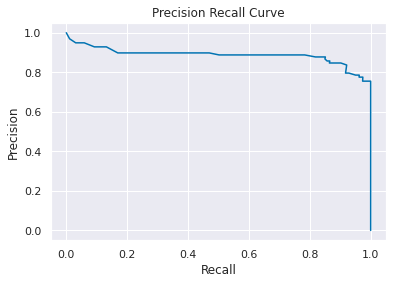

In [ ]:
print('Evaluation of RandomForestClassifier After SMOTE')
print_result(RandomForestClassifier, X_train_o, y_train_o, X_test, y_test)

Evaluation of AdaBoostClassifier After SMOTE

Accuracy: 0.97651
Precision: 0.06461
Recall: 0.93878
F1-score: 0.12089


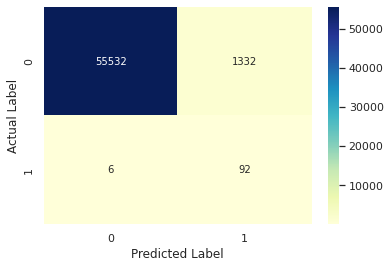

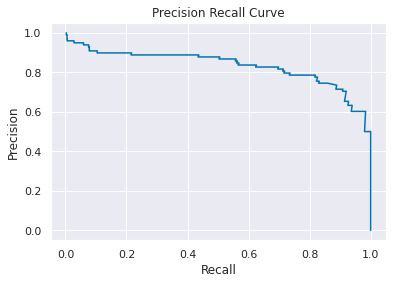

In [ ]:
print('Evaluation of AdaBoostClassifier After SMOTE')
print_result(AdaBoostClassifier, X_train_o, y_train_o, X_test, y_test)

Evaluation of KNeighborsClassifier After SMOTE

Accuracy: 0.99810
Precision: 0.47253
Recall: 0.87755
F1-score: 0.61429


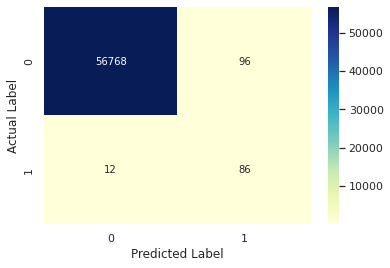

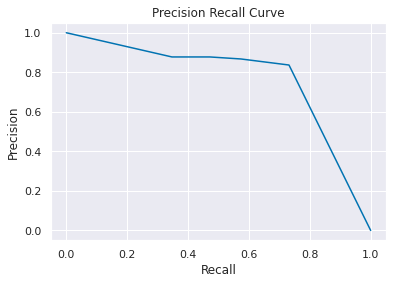

In [ ]:
print('Evaluation of KNeighborsClassifier After SMOTE')
print_result(KNeighborsClassifier, X_train_o, y_train_o, X_test, y_test)

Evaluation of GaussianNB After SMOTE

Accuracy: 0.97581
Precision: 0.05862
Recall: 0.86735
F1-score: 0.10982


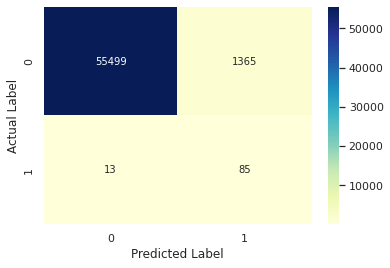

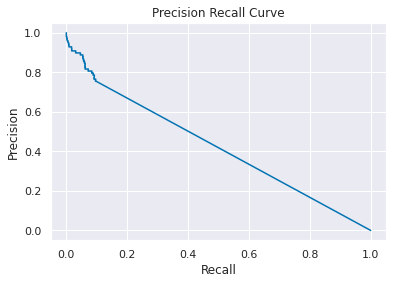

In [ ]:
print('Evaluation of GaussianNB After SMOTE')
print_result(GaussianNB, X_train_o, y_train_o, X_test, y_test)

Evaluation of XGBClassifier After SMOTE

Accuracy: 0.98996
Precision: 0.13650
Recall: 0.90816
F1-score: 0.23733


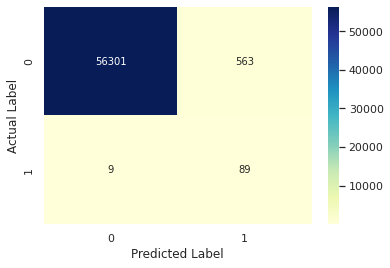

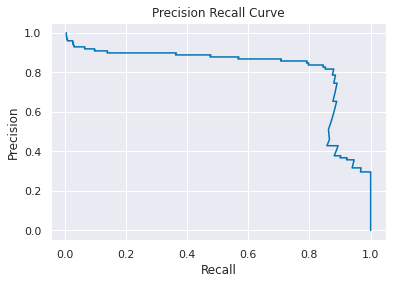

In [36]:
print('Evaluation of XGBClassifier After SMOTE')
print_result(XGBClassifier, X_train_o, y_train_o, X_test, y_test)

**Random Forest Feature Importance**

Feature importance ranking




Text(0.5, 0, 'Feature Importance')

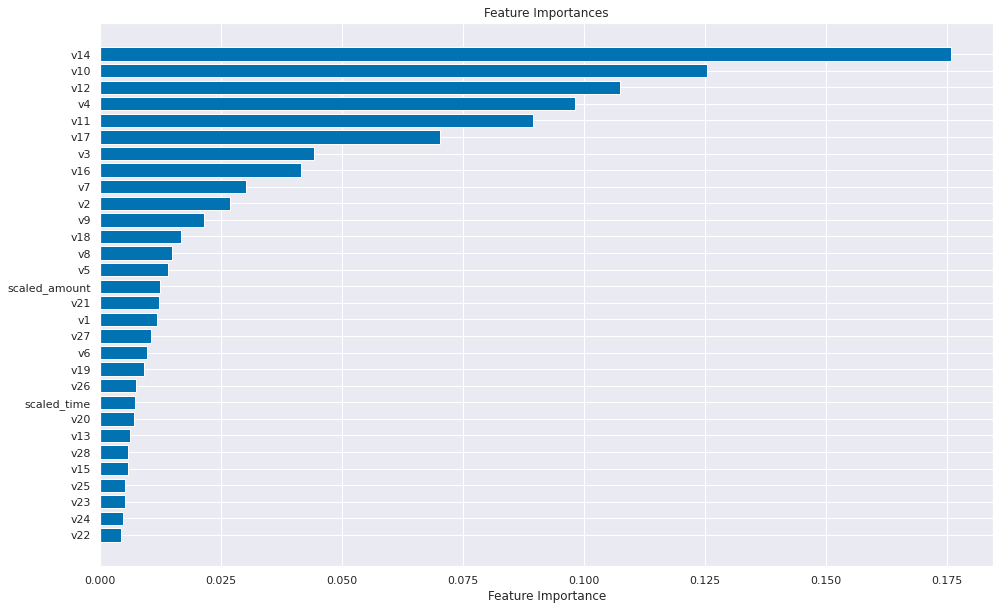

In [ ]:
print('Feature importance ranking\n\n')
rf= RandomForestClassifier()
rf.fit(X_train_o, y_train_o)
y_pred = rf.predict(X_test)
features=df.columns
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(16,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Feature Importance')

**Improving Random Forest**

In [ ]:
!pip install optuna
import optuna
import sklearn
def objective(trial):
      n_estimators = trial.suggest_int('n_estimators', 2, 20)
      max_depth = int(trial.suggest_loguniform('max_depth', 1, 32))
      clf = sklearn.ensemble.RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
      return sklearn.model_selection.cross_val_score(clf, X_train, y_train, 
           n_jobs=-1, cv=3).mean()

     |████████████████████████████████| 308 kB 4.1 MB/s 
     |████████████████████████████████| 80 kB 6.6 MB/s 
     |████████████████████████████████| 209 kB 43.7 MB/s 
     |████████████████████████████████| 75 kB 2.8 MB/s 
     |████████████████████████████████| 49 kB 3.8 MB/s 
     |████████████████████████████████| 149 kB 55.4 MB/s 
     |████████████████████████████████| 112 kB 47.4 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=d0c7742256b70bfeebced1e36891e380420edf6f1c9057f00777f1c550a4c3a0
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2022-01-25 16:06:07,057] A new study created in memory with name: no-name-0ef1309e-dd08-4ba2-890a-449d4bacd06c
[I 2022-01-25 16:06:31,037] Trial 0 finished with value: 0.9991441549020559 and parameters: {'n_estimators': 13, 'max_depth': 3.1784703222816546}. Best is trial 0 with value: 0.9991441549020559.
[I 2022-01-25 16:06:45,342] Trial 1 finished with value: 0.9990300419102729 and parameters: {'n_estimators': 13, 'max_depth': 2.448161901141257}. Best is trial 0 with value: 0.9991441549020559.
[I 2022-01-25 16:06:55,288] Trial 2 finished with value: 0.9994338256270492 and parameters: {'n_estimators': 3, 'max_depth': 12.913854419465201}. Best is trial 2 with value: 0.9994338256270492.
[I 2022-01-25 16:07:13,084] Trial 3 finished with value: 0.999495270772995 and parameters: {'n_estimators': 5, 'max_depth': 28.679350772733528}. Best is trial 3 with value: 0.999495270772995.
[I 2022-01-25 16:07:19,573] Trial 4 finished with value: 0.9987184280216902 and parameters: {'n_estimators': 20

In [ ]:
trial = study.best_trial
print('Accuracy: {}'.format(trial.value))

Accuracy: 0.9995303826894827


In [ ]:
print("Best hyperparameters: {}".format(trial.params))

Best hyperparameters: {'n_estimators': 17, 'max_depth': 14.375614903800926}


In [ ]:
rf = RandomForestClassifier(max_depth=14.375614903800926, n_estimators = 17)
rf.fit(X_train_o, y_train_o)

RandomForestClassifier(max_depth=14.375614903800926, n_estimators=17)

In [ ]:
print("Training score data: ")
print(rf.score(X_train_o, y_train_o))

Training score data: 
0.9993097414388153


In [ ]:
#Testing the model 
#Predicting by X_test
y_pred = rf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
metrics(y_test, y_pred.round())

[[56812    52]
 [   12    86]]
Accuracy: 0.99888
Precision: 0.62319
Recall: 0.87755
F1-score: 0.72881


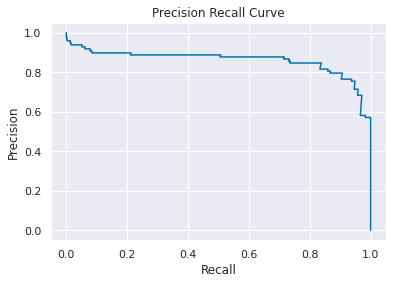

In [ ]:
#Predicting proba
y_pred_prob = rf.predict_proba(X_test)[:,1]

# Generate precision recall curve values: precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

**Improving XGBClassifier**

Model working better without SMOTE

In [68]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
model = XGBClassifier()
#eval_set = [(X_test, y_test)]
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=100, eval_metric=["error","logloss"], eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(confusion_matrix(y_test, y_pred))
metrics(y_test, y_pred.round())

[0]	validation_0-error:0.00065	validation_0-logloss:0.599622	validation_1-error:0.00072	validation_1-logloss:0.5982
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 100 rounds.
[1]	validation_0-error:0.000623	validation_0-logloss:0.521727	validation_1-error:0.000702	validation_1-logloss:0.520419
[2]	validation_0-error:0.000645	validation_0-logloss:0.455536	validation_1-error:0.000685	validation_1-logloss:0.456034
[3]	validation_0-error:0.000636	validation_0-logloss:0.401127	validation_1-error:0.00065	validation_1-logloss:0.401147
[4]	validation_0-error:0.000623	validation_0-logloss:0.354635	validation_1-error:0.00065	validation_1-logloss:0.354423
[5]	validation_0-error:0.000623	validation_0-logloss:0.313916	validation_1-error:0.00065	validation_1-logloss:0.314389
[6]	validation_0-error:0.000628	validation_0-logloss:0.278969	validation_1-error:0.000667	validation_1-logloss:0.27942
[7

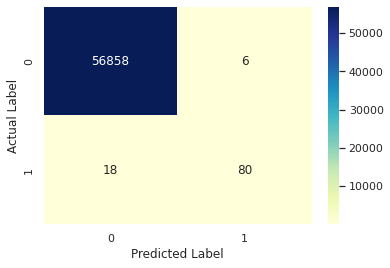

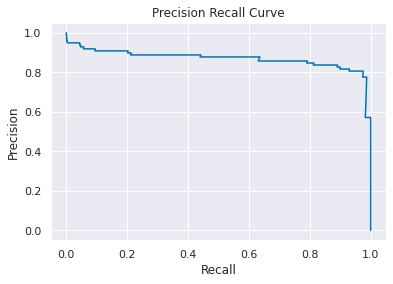

In [69]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

#Predicting proba    
y_pred_prob = model.predict_proba(X_test)[:,1]
# Generate precision recall curve values: precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
# Plot ROC curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

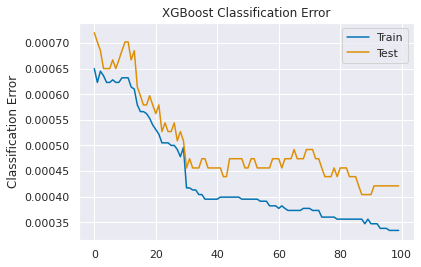

In [70]:
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()